# Classificação

Adaptado de "Zero to mastery - Introdução ao Scikit-Learn": https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb
> O tutorial desse link é bastante completo se você quiser explorar mais o scikit-learn. 

Notas:
* Existem muitas soluções para os enunciados a seguir, implemente a sua :)
* O código fornecido é apenas uma referência, sinta-se livre pra mexer
* As instruções estão nas células textuais e devem ser implementadas na célula de código subsequente.
* Buscadores são seu melhor amigo! Na dúvida, procure "como fazer XYZ no scikit-learn".


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Modelos
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Funções úteis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

plt.style.use('ggplot')
np.random.seed(42)

## Carregamento de dados

A seguir, carregaremos a base de dados que possui atributos anônimos de cerca de 300 pacientes, cujo objetivo é uma classificação binária indicando a presença de um problema cardíaco naquele paciente (1: Sim, 0: Não).

In [2]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/CongLiu-CN/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Q1. Pré-processamento

* Separe os dados `(X, y)` em treino e teste `(Xtrain. Xtest, ytrain, ytest)`. Dica: `train_test_split` já importada nesse script.
* Normalize os dados. Lembre-se de ajustar os parâmetros de normalização **usando apenas os dados de treino**, mas normalize ambos os conjuntos. Dica: `StandardScaler` já importado no script.

In [3]:
# Selecionando as dimensões de idade e batimentos máximos
X = heart_disease.drop("target", axis=1).to_numpy()
y = heart_disease["target"]

## TODO separe em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## TODO normalize os dados
stdScaler = StandardScaler()
X_train   = stdScaler.fit_transform(X_train, y_test)
X_test    = stdScaler.transform(X_test)

X_train, X_test

(array([[ 0.26745345,  0.71647284, -0.0127744 , ...,  0.97351831,
          0.30327986, -0.53044521],
        [ 0.4831264 ,  0.71647284,  0.95382211, ..., -0.6634347 ,
          0.30327986, -2.20282109],
        [ 1.34581817,  0.71647284, -0.97937092, ..., -0.6634347 ,
          1.30102663,  1.14193067],
        ...,
        [ 1.56149112,  0.71647284,  1.92041862, ..., -0.6634347 ,
          0.30327986, -0.53044521],
        [-0.91874774,  0.71647284, -0.97937092, ...,  0.97351831,
         -0.69446692,  1.14193067],
        [ 0.91447229, -1.39572632, -0.0127744 , ...,  0.97351831,
          1.30102663, -0.53044521]]),
 array([[ 0.26745345,  0.71647284, -0.97937092,  1.16826465,  0.55847168,
         -0.382707  , -1.04486089, -1.67196572,  1.46723474, -0.38759507,
         -0.6634347 ,  0.30327986, -2.20282109],
        [ 0.4831264 ,  0.71647284,  1.92041862,  2.34508328,  0.78298125,
         -0.382707  , -1.04486089,  0.41169299, -0.6815542 , -0.75004237,
         -0.6634347 , -0.694

## Q2. Classificação com 2 atributos

Usando os atributos idade (age) e taxa máxima de batimentos cardíacos (thalach) iremos treinar a primeira leva de classificadores. Nessa etapa, defina empiricamente* hiperparâmetros que produzam classificadores interessantes. Note que este é um par de atributos com distribuições bastante misturadas, então algum nível de erro é esperado.

> *definições empíricas significam testar alguns hiperparâmetros seguindo sua intuição. A ideia é você fuçar métricas e visualizações para entender o comportamento de cada hiperparâmetro.

Você deve testar pelo menos os seguintes modelos e hiperparâmetros:
* [SVC Kernel Linear](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): `C`
* [SVC Kernel Polinomial](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): `C, grau, coef0`
* [SVC Kernel RBF](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): `C, gamma`
* [Árvores de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `max_depth, min_impurity_decrease` 
* [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html): `C`
* [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors, weights`

Na célula a seguir, iremos apenas separar os dados de treino em treino e validação para brincar com a definição de hiperparâmetros na célula seguinte.

(227, 2) (227,)


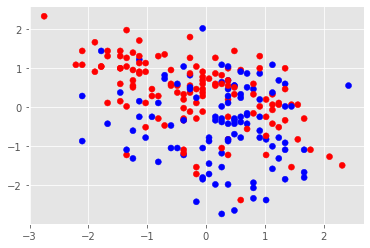

In [4]:
## TODO Selecione as dimensões de idade e batimentos máximos (só descomentar se Xtrain e ytrain já foram definidos)
X2d = X_train[:, [0, 7]]
y2d = y_train

## TODO Visualize a distribuição (só descomentar)
plt.scatter(X2d[:, 0], X2d[:, 1], c=y2d, cmap='bwr')
print(X2d.shape, y2d.shape)

## TODO Separar os dados (X2d, y2d) em treino e validação (X2d_train, X2d_val, y2d_train, y2d_val)
X2d_train, X2d_val, y2d_train, y2d_val = train_test_split(X2d, y2d)

* Deixe na célula a seguir os 6 classificadores solicitados no enunciado com os hiperparâmetros que você definiu empiricamente.
* Plot a visualização da fronteira de decisão de cada um de seus classificadores.
* No título de cada plot inclua: 1) O classificador, 2) acurácia de treino e 3) acurácia de validação.

A célula abaixo já traz a função `plot_boundary(X, y, clf)` que recebe dados, rótulos e um estimador, e apresenta uma visualização da fronteira de decisão. Complete a célula como identificado abaixo.

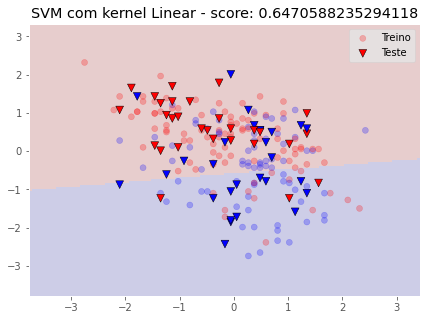

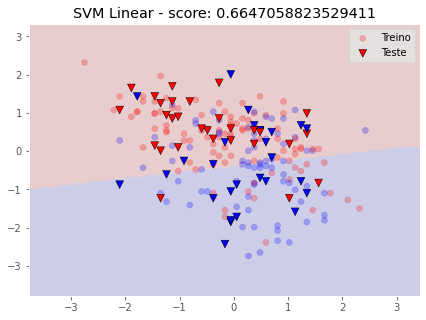

In [5]:
def plot_boundary(Xtr, Xts, ytr, yts, clf, clf_name='SVM'):
  
  x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
  y_min, y_max = Xtr[:, 0].min() - 1, Xtr[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  fig, ax = plt.subplots(1, 1, figsize=(7, 5))
  ax.grid(False)
  ax.pcolormesh(xx, yy, Z, alpha=0.1, cmap='bwr')
  ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, alpha=0.25, cmap='bwr', label='Treino')
  ax.scatter(Xts[:, 0], Xts[:, 1], c=yts, marker='v', edgecolors='k', s=60, cmap='bwr', label='Teste')
  
  ## TODO organize o título da figura com o score do estimador clf (parâmetro)
  score = clf.score(Xtr, ytr)
  plt.title(f'{clf_name} - score: {score}')
  
  plt.legend()
  plt.show()

## TODO defina os classificadores e plot as fronteiras
## Exemplo:
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'SVM com kernel Linear')

# SVM Linear
clf_svmlinear = svm.LinearSVC(C=0.1, dual = False)
clf_svmlinear.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmlinear, 'SVM Linear')

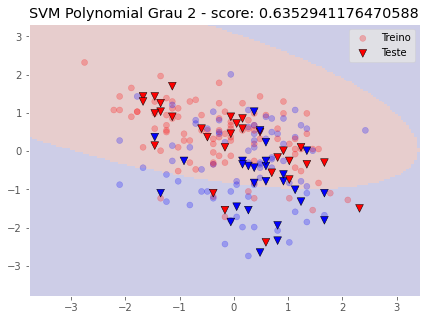

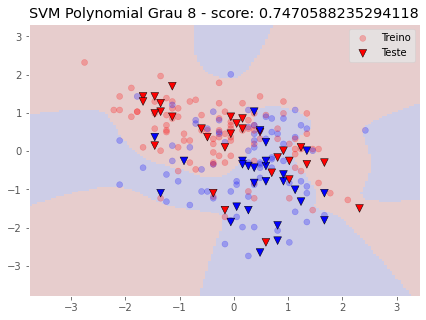

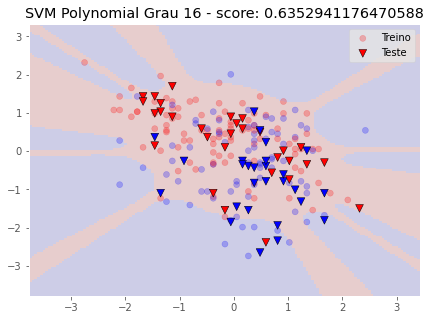

In [14]:
# SVM Polynomial
clf_svmpoly = svm.SVC(kernel='poly', C=0.1, degree = 2, coef0=1)
clf_svmpoly.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmpoly, 'SVM Polynomial Grau 2')

clf_svmpoly = svm.SVC(kernel='poly', C=0.1, degree = 8, coef0=2)
clf_svmpoly.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmpoly, 'SVM Polynomial Grau 8')

clf_svmpoly = svm.SVC(kernel='poly', C=0.1, degree = 16, coef0=0)
clf_svmpoly.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmpoly, 'SVM Polynomial Grau 16')

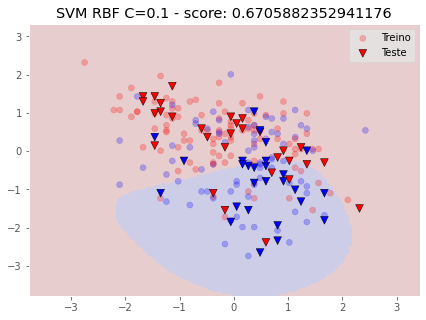

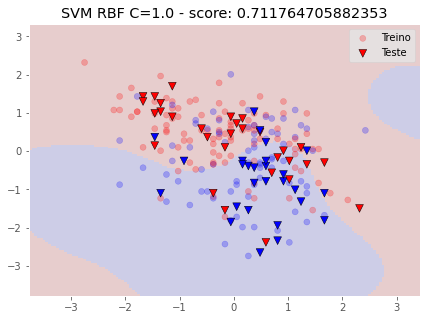

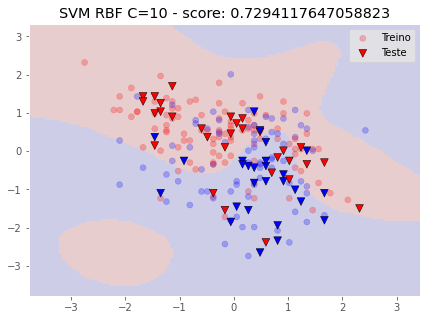

In [15]:
# SVC RBF
clf_svmrbf = svm.SVC(kernel='rbf', C=0.1, gamma='auto')
clf_svmrbf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmrbf, 'SVM RBF C=0.1')

clf_svmrbf = svm.SVC(kernel='rbf', C=1, gamma='scale')
clf_svmrbf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmrbf, 'SVM RBF C=1.0')

clf_svmrbf = svm.SVC(kernel='rbf', C=10, gamma='auto')
clf_svmrbf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_svmrbf, 'SVM RBF C=10')

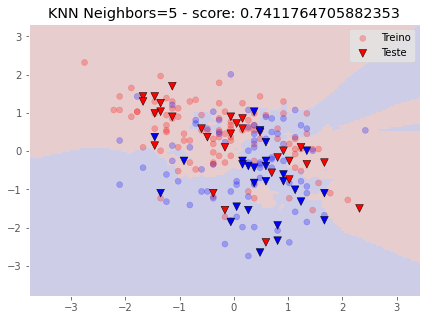

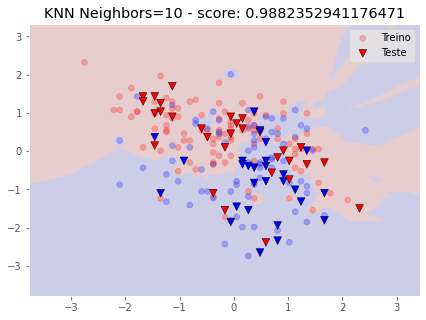

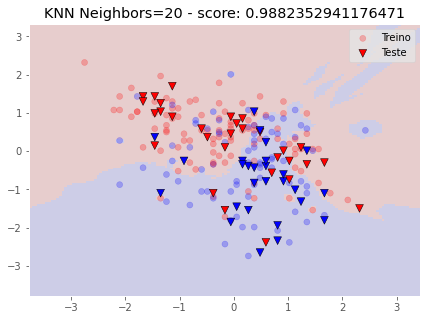

In [16]:
# K Neighbors Classifier
clf_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf_knn.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_knn, 'KNN Neighbors=5')

clf_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf_knn.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_knn, 'KNN Neighbors=10')

clf_knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
clf_knn.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_knn, 'KNN Neighbors=20')

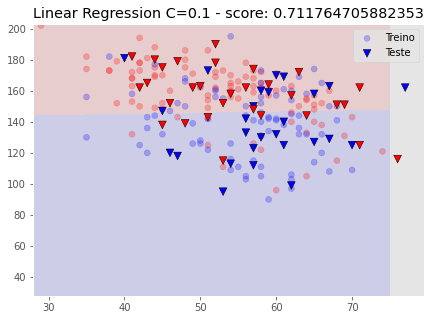

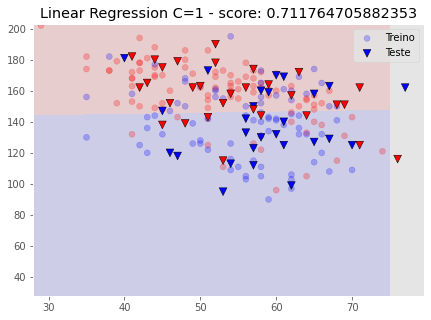

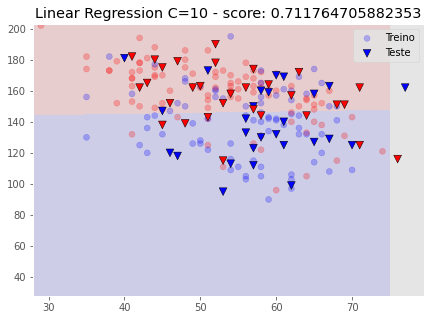

In [50]:
# Linear Regression
clf_regression = LogisticRegression(C=0.1)
clf_regression.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_regression, 'Linear Regression C=0.1')

clf_regression = LogisticRegression(C=1)
clf_regression.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_regression, 'Linear Regression C=1')
              
clf_regression = LogisticRegression(C=10)
clf_regression.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_regression, 'Linear Regression C=10')

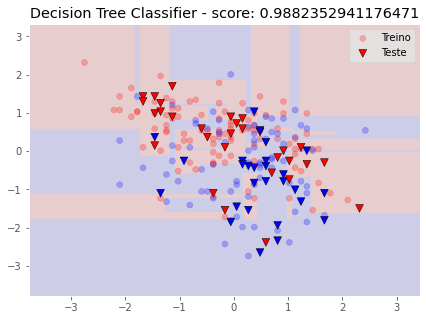

In [24]:
# Decision Tree Classifier
clf_tree = DecisionTreeClassifier(max_depth=100, min_impurity_decrease=0)
clf_tree.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf_tree, 'Decision Tree Classifier')

## Q3. Otimização de hiperparâmetros

Agora a brincadeira fica séria. Vamos definir um classificador usando todos os atributos da base. Agora que você já entende melhor os classificadores e os efeitos de cada hiperparâmetro, defina uma busca ([em grid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) ou [aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)) para otimizar os hiperparâmetros de **dois classificadores de sua escolha**.

> Sugestão: escolha dois classificadores bem distintos entre si para comparar os resultados. 

Passo a passo:
* Realize a otimização de hiperparâmetros utilizando **apenas os dados de treino**.
* Selecione a melhor configuração para cada classificador que você escolheu
* Reporte os resultados dos seus classificadores no conjunto de teste (que não mexemos até agora ;). Dica: `classification_report` e `confusion_matrix` já importados.


In [25]:
## TODO busque os melhores hiperparâmetros
clf = svm.SVC()

parametros_SVC = {'C': np.arange(1,10,1), 'gamma': ['auto','scale'], 'kernel': ['rbf','poly','sigmoid','linear']}
randSearch = RandomizedSearchCV(clf, parametros_SVC, n_jobs=-1).fit(X2d_train, y2d_train)

randSearch.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 6}

In [27]:
clf = KNeighborsClassifier()

parametros_KNN = {'n_neighbors':np.arange(5, 20, 1), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights':['uniform', 'distance']}
randSearch = RandomizedSearchCV(clf, parametros_KNN, n_jobs=-1).fit(X2d_train, y2d_train)

randSearch.best_params_

{'weights': 'uniform', 'n_neighbors': 12, 'algorithm': 'brute'}

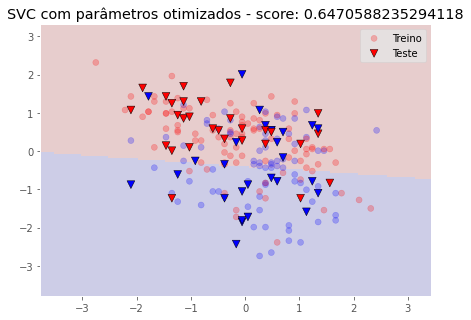

              precision    recall  f1-score   support

           0       0.50      0.82      0.62        17
           1       0.90      0.65      0.75        40

    accuracy                           0.70        57
   macro avg       0.70      0.74      0.69        57
weighted avg       0.78      0.70      0.71        57

[[14  3]
 [14 26]]


In [14]:
## TODO Retreine os modelos com os melhores hiperparâmetros
clf = svm.SVC(kernel='linear', gamma='scale', C=6)
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'SVC com parâmetros otimizados')

## TODO Reporte o desempenho de cada classificador
predict = clf.predict(X2d_val)
print(classification_report(predict, y2d_val))
print(confusion_matrix(predict, y2d_val))

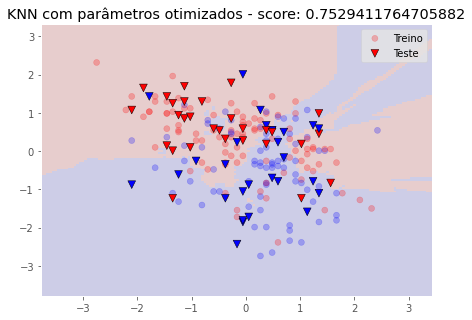

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        23
           1       0.79      0.68      0.73        34

    accuracy                           0.70        57
   macro avg       0.70      0.71      0.70        57
weighted avg       0.72      0.70      0.70        57

[[17  6]
 [11 23]]


In [16]:
## TODO Retreine os modelos com os melhores hiperparâmetros
clf = KNeighborsClassifier(weights='uniform', n_neighbors=12, algorithm='brute')
clf.fit(X2d_train, y2d_train)
plot_boundary(X2d_train, X2d_val, y2d_train, y2d_val, clf, 'KNN com parâmetros otimizados')

## TODO Reporte o desempenho de cada classificador
predict = clf.predict(X2d_val)
print(classification_report(predict, y2d_val))
print(confusion_matrix(predict, y2d_val))

## Dica extra: Salvando e carregando modelos

A biblioteca pickle permite salvar e carregar arquivos binários contendo objetos do python. A célula a seguir apresenta um exemplo dessas funções. 

In [54]:
import pickle

## Save an existing model to file
pickle.dump(clf, open("svm_linear_c10.pkl", "wb"))

## Load a saved model and make a prediction
loaded_model = pickle.load(open("svm_linear_c10.pkl", "rb"))
loaded_model.score(X_test, y_test)